## Task 2
We now plot the stars in equatorial and galactic coordinates along with the galactic plane as instructed in the lab manual.


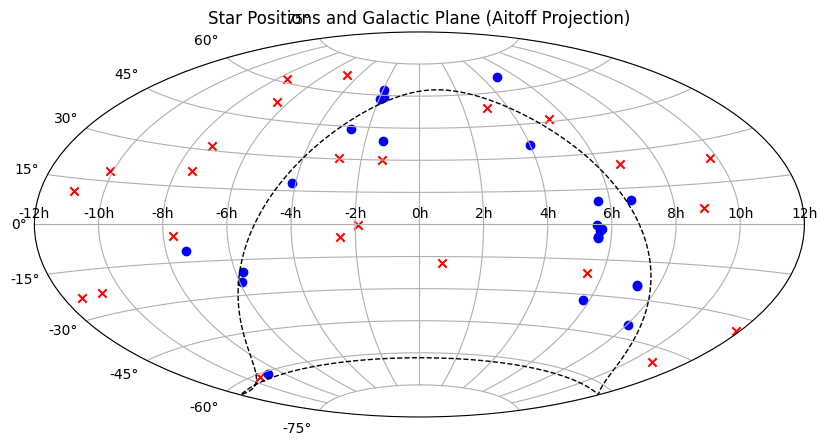

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u


coords_x = [
    ("14:39:36.5", "-60:50:02"),
    ("05:16:41.4", "+45:59:53"),
    ("00:43:35.4", "-17:59:12"),
    ("12:34:23.2", "-23:23:48"),
    ("13:54:41.1", "+18:23:52"),
    ("10:46:46.2", "-49:25:12"),
    ("16:23:59.5", "+61:30:51"),
    ("16:30:13.2", "+21:29:23"),
    ("17:30:26.0", "+52:18:05"),
    ("11:52:54.5", "-33:54:29"),
    ("16:41:17.2", "+31:36:10"),
    ("13:02:10.6", "+10:57:33"),
    ("05:28:14.7", "-20:45:34"),
    ("21:31:33.5", "-05:34:16"),
    ("03:04:47.8", "+53:30:23"),
    ("22:43:00.1", "+30:13:16"),
    ("22:05:47.0", "-00:19:11"),
    ("09:45:51.1", "+23:46:27"),
    ("13:18:55.3", "-23:10:17"),
    ("06:43:55.9", "+25:07:52"),
    ("19:12:33.3", "+67:39:42"),
    ("08:55:23.6", "+05:56:44"),
    ("21:12:56.2", "+30:13:37"),
    ("16:18:19.3", "-04:41:33")
]


coords_o = [
    ("05:40:45.5", "-01:56:33"),
    ("05:32:00.4", "-00:17:57"),
    ("08:03:35.0", "-40:00:11"),
    ("16:37:09.5", "-10:34:02"),
    ("05:35:26.0", "-05:54:36"),
    ("05:38:08.3", "+09:56:03"),
    ("03:58:57.9", "+35:47:28"),
    ("05:38:44.8", "-02:36:00"),
    ("04:54:03.0", "+66:20:34"),
    ("07:18:42.5", "-24:57:16"),
    ("22:39:15.7", "+39:03:01"),
    ("07:18:40.0", "-24:33:41"),
    ("21:18:27.2", "+43:56:45"),
    ("15:16:56.9", "-60:57:26"),
    ("22:11:30.6", "+59:24:52"),
    ("22:05:08.8", "+62:16:47"),
    ("05:45:59.9", "-32:18:23"),
    ("22:02:04.6", "+58:00:01"),
    ("18:03:52.4", "-24:21:39"),
    ("18:15:13.0", "-20:23:17"),
    ("19:52:21.8", "+18:40:19"),
    ("05:35:16.5", "-05:23:23"),
    ("06:40:58.7", "+09:53:45"),
    ("05:35:22.9", "-05:24:58")
]


def convert_coords(coords):
    ra_rad = []
    dec_rad = []
    for RA, DEC in coords:
        coord = SkyCoord(ra=RA, dec=DEC, unit=(u.hourangle, u.deg), frame='icrs')
        ra_rad.append(coord.ra.wrap_at(180 * u.deg).radian)
        dec_rad.append(coord.dec.radian)
    return ra_rad, dec_rad

ra_x, dec_x = convert_coords(coords_x)
ra_o, dec_o = convert_coords(coords_o)


l = np.linspace(0, 360, 1000)
b = np.zeros_like(l)
galactic = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic').transform_to('icrs')
ra_gal = galactic.ra.wrap_at(180 * u.deg).radian
dec_gal = galactic.dec.radian


plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="aitoff")
ax.plot(ra_gal, dec_gal, 'k--', lw=1)
ax.scatter(ra_x, dec_x, marker='x', color='red')
ax.scatter(ra_o, dec_o, marker='o', color='blue')
tick_labels = [f'{i}h' for i in range(-12, 13, 2)]
tick_locations = np.radians([i * 15 for i in range(-12, 13, 2)]) 
ax.set_xticks(tick_locations)
ax.set_xticklabels(tick_labels)
ax.set_title("Star Positions and Galactic Plane (Aitoff Projection)")
ax.grid(True)
plt.show()


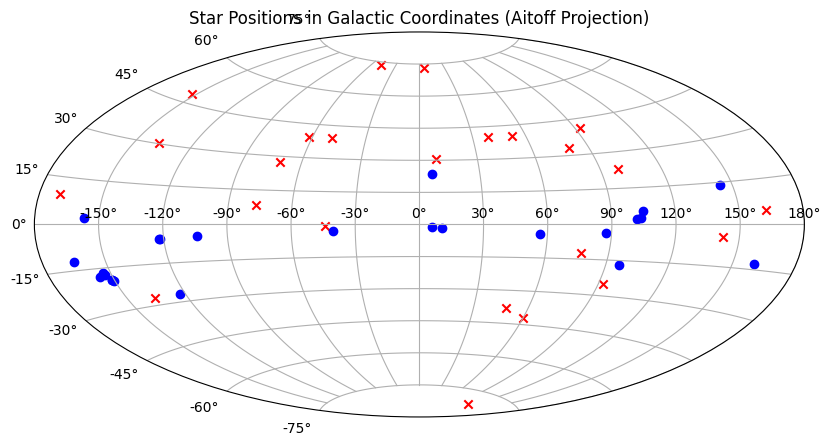

In [2]:
import numpy as np
import matplotlib.pyplot as plt

coords_x_galactic = [
    (315.7, -0.7), (162.6, 4.6), (111.3, -80.7), (297.9, 39.4), (5.3, 73.0), (283.0, 8.6),
    (92.6, 41.0), (39.0, 40.2), (79.6, 33.3), (289.3, 27.4), (52.7, 40.3), (312.3, 73.6),
    (223.6, -27.2), (48.0, -37.9), (142.1, -4.3), (92.5, -25.0), (59.9, -42.1), (206.8, 48.2),
    (311.1, 39.3), (189.5, 9.6), (98.7, 23.0), (222.3, 30.2), (76.8, -12.5), (8.6, 30.8)
]

coords_o_galactic = [
    (206.5, -16.6), (203.9, -17.7), (256.0, -4.7), (6.3, 23.6), (209.5, -19.6), (195.1, -12.0),
    (160.4, -13.1), (206.8, -17.3), (144.1, 14.0), (238.2, -5.5), (96.7, -17.0), (237.8, -5.4),
    (87.6, -3.8), (319.7, -2.9), (103.8, 2.6), (104.9, 5.4), (237.3, -27.1), (102.0, 2.2),
    (6.0, -1.2), (10.8, -1.6), (56.5, -4.3), (209.0, -19.4), (202.9, 2.2), (209.0, -19.4)
]

def wrap_galactic_coords(coords):
    l_rad = np.radians([l - 360 if l > 180 else l for l, b in coords])
    b_rad = np.radians([b for l, b in coords])
    return l_rad, b_rad

l_x, b_x = wrap_galactic_coords(coords_x_galactic)
l_o, b_o = wrap_galactic_coords(coords_o_galactic)

plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="aitoff")
ax.scatter(l_x, b_x, marker='x', color='red')   
ax.scatter(l_o, b_o, marker='o', color='blue') 

tick_labels = [f"{i}°" for i in range(-150, 181, 30)]
tick_locations = np.radians(range(-150, 181, 30))
ax.set_xticks(tick_locations)
ax.set_xticklabels(tick_labels)

ax.set_title("Star Positions in Galactic Coordinates (Aitoff Projection)")
ax.grid(True)
plt.show()